<a href="https://colab.research.google.com/github/ryanditata/fuzzy-pendeteksiTsunami/blob/main/grafikFuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Design values: [50.00000000000005, 81.3456535854027, 50.00000000000008, 79.53228905597312, 80.43254191144615, 41.11111111111131, 38.37057576088481, 31.786685467231212, 39.24904063089877, 41.11111111111131]


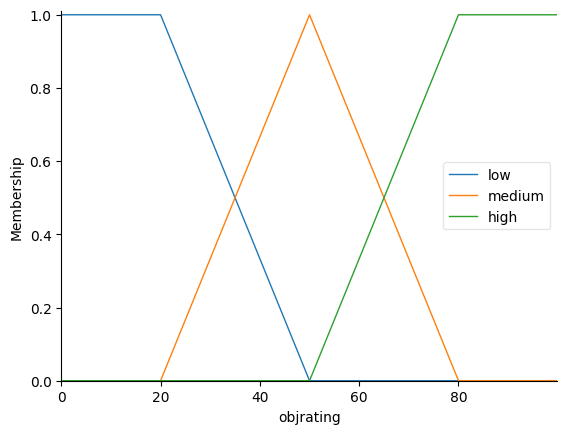

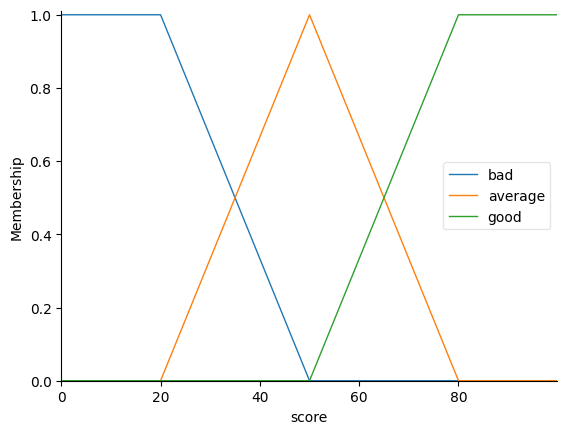

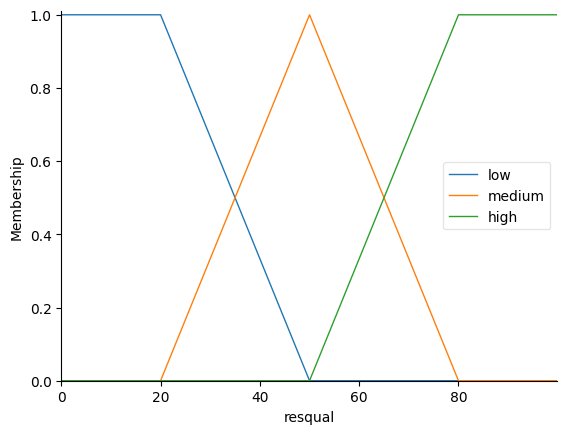

In [ ]:
!pip install -U scikit-fuzzy

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Definisi rentang nilai
start, stop, step = 0, 100, 0.1

# Definisi variabel fuzzy
objrating = ctrl.Antecedent(np.arange(start, stop, step), 'objrating')
score = ctrl.Antecedent(np.arange(start, stop, step), 'score')
resqual = ctrl.Consequent(np.arange(start, stop, step), 'resqual')

# Definisi fungsi keanggotaan
objrating['low'] = fuzz.trapmf(objrating.universe, [0, 0, 20, 50])
objrating['medium'] = fuzz.trimf(objrating.universe, [20, 50, 80])
objrating['high'] = fuzz.trapmf(objrating.universe, [50, 80, 100, 100])

score['bad'] = fuzz.trapmf(score.universe, [0, 0, 20, 50])
score['average'] = fuzz.trimf(score.universe, [20, 50, 80])
score['good'] = fuzz.trapmf(score.universe, [50, 80, 100, 100])

resqual['low'] = fuzz.trapmf(resqual.universe, [0, 0, 20, 50])
resqual['medium'] = fuzz.trimf(resqual.universe, [20, 50, 80])
resqual['high'] = fuzz.trapmf(resqual.universe, [50, 80, 100, 100])

# Definisi aturan fuzzy
rules = [
    ctrl.Rule(objrating['low'] & score['bad'], resqual['low']),
    ctrl.Rule(objrating['low'] & score['average'], resqual['low']),
    ctrl.Rule(objrating['low'] & score['good'], resqual['medium']),
    ctrl.Rule(objrating['medium'] & score['bad'], resqual['low']),
    ctrl.Rule(objrating['medium'] & score['average'], resqual['medium']),
    ctrl.Rule(objrating['medium'] & score['good'], resqual['medium']),
    ctrl.Rule(objrating['high'] & score['bad'], resqual['medium']),
    ctrl.Rule(objrating['high'] & score['average'], resqual['high']),
    ctrl.Rule(objrating['high'] & score['good'], resqual['high'])
]

# Membuat sistem kendali fuzzy
design_ctrl = ctrl.ControlSystem(rules)
design = ctrl.ControlSystemSimulation(design_ctrl)

# Input data untuk prediksi
input_data = np.array([
    [50.00, 70.00], [79.98, 80.00], [50.00, 80.00], [80.71, 70.00], [79.36, 90.00],
    [18.57, 70.00], [37.06, 60.00], [30.53, 50.00], [37.99, 60.00], [18.57, 70.00]
])

# Menjalankan simulasi dan menyimpan hasil
predicted_output = []
for obj, scr in input_data:
    design.input['objrating'] = obj
    design.input['score'] = scr
    design.compute()
    predicted_output.append(design.output['resqual'])

# Menampilkan hasil prediksi
print(f'Design values: {predicted_output}')

# Menampilkan grafik fungsi keanggotaan
objrating.view()
score.view()
resqual.view()